In [1]:
#!conda info

In [2]:
import warnings
warnings.filterwarnings('ignore')

## **Import Dataset**

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### **Check all info from dataset**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### **Check Missing value**

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### **Check statistic of dataset**

In [7]:
data.describe(include ='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### **Convert value from column 'sex', 'smoker', 'region' to numeric value**

In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
val_con = data.select_dtypes(include = ['object']).columns
val_con

Index(['sex', 'smoker', 'region'], dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
en = LabelEncoder()

for i in val_con:
    data[i] =en.fit_transform(data[i])

In [12]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


### **Split data to train set & test set**

In [13]:
X = data.drop(['charges'], axis = 1)
y = data['charges']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### **Import models**

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

### **Model Training**

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

### **Prediction on Test Data**

In [18]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

### **Check performance of models & Evaluating the algorithm**

In [19]:
from sklearn import metrics

In [20]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

In [21]:
print(score1, score2, score3, score4)

0.7833463107364539 -0.07230823043884493 0.8636366578901437 0.8779726251291786


In [22]:
model_perform = pd.DataFrame({
    'Model' : ['LR', 'SVR', 'RF', 'GB'],
    'R2_Score' : [score1, score2, score3, score4]
})

model_perform

,Model,R2_Score
0,LR,0.783346
1,SVR,-0.072308
2,RF,0.863637
3,GB,0.877973


In [23]:
import seaborn as sns

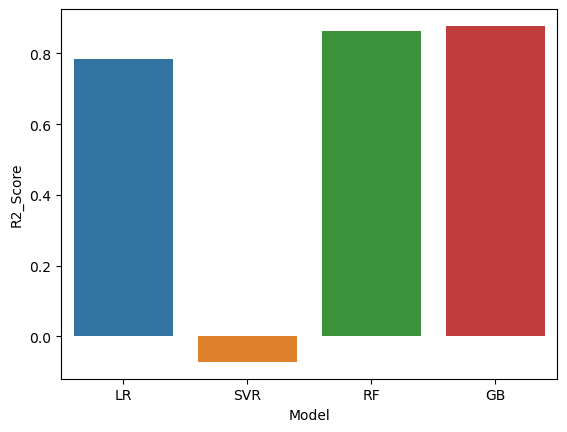

In [24]:
sns.barplot(x = model_perform['Model'], y = model_perform['R2_Score']);

### **Predict Charges for new customer & save the model**

In [39]:
X = data.drop('charges', axis = 1) #independen variabel
y = data['charges'] #dependen variabel

In [40]:
gr = GradientBoostingRegressor()
gr.fit(X, y)

GradientBoostingRegressor()

**Save model**

In [41]:
import joblib

joblib.dump(gr, 'charges_predict_using_gr')

['charges_predict_using_gr']

In [42]:
final_model = joblib.load('charges_predict_using_gr')

**Predict Charges**

In [43]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [44]:
df = pd.DataFrame({
    'age' : 19,
    'sex' : 1,
    'bmi' : 33,
    'children' : 1,
    'smoker' : 1,
    'region' : 3
}, index = [0])

df

,age,sex,bmi,children,smoker,region
0,19,1,33,1,1,3


In [45]:
final_model.predict(df)

array([35096.34043924])

### **GUI**

In [56]:
from tkinter import *
import joblib
import pandas as pd

In [61]:
def show_entry_fields():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())

    final_model = joblib.load('charges_predict_using_gr')
    df = pd.DataFrame({
    'age' : p1,
    'sex' : p2,
    'bmi' : p3,
    'children' : p4,
    'smoker' : p5,
    'region' : p6
    }, index = [0])

    result = final_model.predict(df)

    Label(master, text = 'Biaya asuransi = ').grid(row = 8)
    Label(master, text = result).grid(row = 11)
    print('Hasil prediksi biaya = ', result)

master = Tk()
master.title('Prediksi biaya asuransi kesehatan pelanggan baru')

label = Label(
    master, text = 'Prediksi Biaya Asuransi Kesehatan',
    bg = 'blue',
    fg = 'white'
).grid(row = 0, columnspan = 6)

Label(master, text = 'age').grid(row = 1)
Label(master, text = 'sex').grid(row = 2)
Label(master, text = 'bmi').grid(row = 3)
Label(master, text = 'children').grid(row = 4)
Label(master, text = 'smoker').grid(row = 5)
Label(master, text = 'region').grid(row = 6)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e1.grid(row = 1, column = 1)
e2.grid(row = 2, column = 1)
e3.grid(row = 3, column = 1)
e4.grid(row = 4, column = 1)
e5.grid(row = 5, column = 1)
e6.grid(row = 6, column = 1)

Button(master, text = 'Predict', command = show_entry_fields).grid()

mainloop()